In [20]:
import cv2
import os
from matplotlib import pyplot as plt
from PIL import ImageFont, ImageDraw, Image
import numpy as np

In [22]:
# Some helper functions to draw image with object boundary boxes
fontname = '/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf'
font = ImageFont.truetype(fontname, 40) if os.path.isfile(fontname) else ImageFont.load_default()

def bbox(img, xmin, ymin, xmax, ymax, width, score):
    draw = ImageDraw.Draw(img)
    xres, yres = img.size[0], img.size[1]
    box = [xmin, ymin, xmax, ymax]#np.multiply([xmin, ymin, xmax, ymax], [xres, yres, xres, yres]).astype(int).tolist()
    draw.rectangle(box, outline=1, width=width)

def plot_img(img, axes, xmin, ymin, xmax, ymax):
    for i in range(len(xmin)):
        bbox(img, xmin[i], ymin[i], xmax[i], ymax[i], 5, -1)
#     bbox(img, xmin, ymin, xmax, ymax, 5, -1)
    plt.setp(axes, xticks=[], yticks=[])
    plt.imshow(img)


(720, 1280, 3)


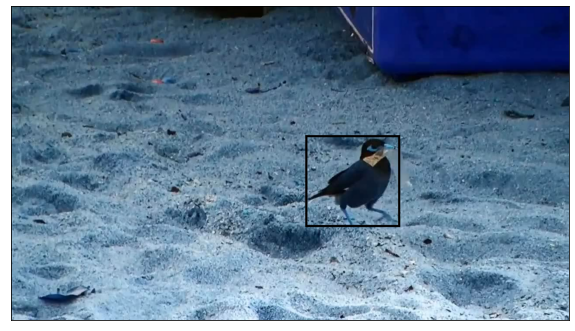

In [11]:
# Imagenet example:
# <annotation>
# 	<folder>ILSVRC2017_VID_train_0000/ILSVRC2017_train_00000000</folder>
# 	<filename>000000</filename>
# 	<source>
# 		<database>ILSVRC_2017</database>
# 	</source>
# 	<size>
# 		<width>1280</width>
# 		<height>720</height>
# 	</size>
# 	<object>
# 		<trackid>0</trackid>
# 		<name>n01503061</name>
# 		<bndbox>
# 			<xmax>892</xmax>
# 			<xmin>675</xmin>
# 			<ymax>506</ymax>
# 			<ymin>296</ymin>
# 		</bndbox>
# 		<occluded>0</occluded>
# 		<generated>0</generated>
# 	</object>
# </annotation>
path_to_frame_files = "/mnt/storage/Msc/ImageNet/ILSVRC2017_VID_new/ILSVRC/Data/VID/train/ILSVRC2017_VID_train_0000/ILSVRC2017_train_00000000"
filename = "000000.JPEG"
path_to_frame_file = os.path.join(path_to_frame_files, filename)
xmax = 892
xmin = 675
ymax = 506
ymin = 296

img_np = cv2.imread(path_to_frame_file)
print(img_np.shape)
img = Image.fromarray(img_np)

fig = plt.figure(figsize=(10,10))
axes = fig.add_subplot(1, 1, 1)
plot_img(img, axes, [xmin], [ymin], [xmax], [ymax])

(600, 800, 3)


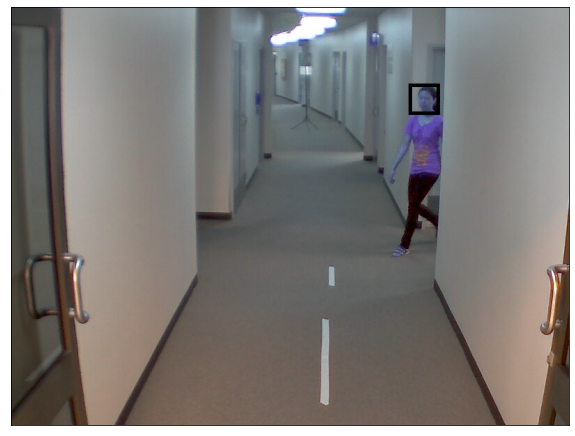

In [19]:
# <annotation>
# 	<folder>data/P2L_S2/P2L_S2_C2/P2L_S2_C2.2</folder>
# 	<filename>00000178</filename>
# 	<source>Chokepoint_Dataset</source>
# 	<size>
# 		<width>800</width>
# 		<height>600</height>
# 	</size>
# 	<object>
# 		<trackid>0</trackid>
# 		<name>face</name>
# 		<bndbox>
# 			<xmax>614</xmax>
# 			<xmin>570</xmin>
# 			<ymax>155</ymax>
# 			<ymin>111</ymin>
# 		</bndbox>
# 		<occluded>0</occluded>
# 		<generated>0</generated>
# 	</object>
# </annotation>
def expand_bbox(xmin,ymin,xmax, ymax):
    expand_by =10
    xmin = xmin-expand_by
    xmax = xmax+expand_by
    ymin = ymin-expand_by
    ymax = ymax+expand_by
    return xmin, ymin, xmax, ymax
path_to_frame_files = "/home/oole/Data/Chokepoint/data/P2L_S2/P2L_S2_C2/P2L_S2_C2.2"
filename = "00000178.jpg"
path_to_frame_file = os.path.join(path_to_frame_files, filename)
xmax = 614
xmin = 570
ymax = 155
ymin = 111
# xmin, ymin, xmax, ymax = expand_bbox(xmin, ymin, xmax, ymax)

img_np = cv2.imread(path_to_frame_file)
print(img_np.shape)
img = Image.fromarray(img_np)

fig = plt.figure(figsize=(10,10))
axes = fig.add_subplot(1, 1, 1)
plot_img(img, axes, [xmin], [ymin], [xmax], [ymax])
